# Step Response of a Gravity Drained Tank

## Nonlinear Step Response

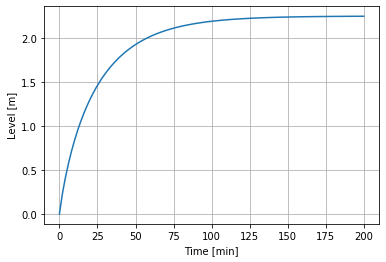

In [1]:
#import library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#parameter
Cv = 0.1 # Outlet valve constant [m^3/min/m^1/2]
A = 1.0  # Tank area [m^2]

# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15
# differential equation
def deriv(h,t):
    dhdt = qin(t)/A-Cv*np.sqrt(h)/A
    return qin(t)/A-Cv*np.sqrt(h)/A

#solve
IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t) # equation / initial condition / devide by t

#Graph
plt.plot(t,h)        

plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.grid()
plt.show()

## Linear Approximation of the Step Response

### 1.Fit for K

In [5]:
q0,h0 = 0,0
qss = qin(t[-1]) # qin steady state at last time
hss = h[-1] # h at steady state
# K = control var / manipulate var 
K = (hss-h0)/(qss-q0) # step change in output divided by step change in input
print('Steady State Gain is approximately = {:.2f}'.format(K[0]))

Steady State Gain is approximately = 14.99


### 2.Fit for tau

In [33]:
k = sum(t<25) # find index in t corresponding to 25 min boolean 13 numb
print('Transient portion of the nonlinear response(k)=',k) # k =13
tk = t[k] # t at k(13)
hk = h[k] # h at k(13)
# from ((xss-x(t))/(xss-x(0))) = exp(-t/tau) or tau = (-t)/log((xss-x(t))/(xss-x(0)))
tau = -tk/np.log((hss-hk)/(hss-h0))
print('Estimated time constant is {:.2f}'.format(tau[0]))

Transient portion of the nonlinear response(k)= 13
Estimated time constant is 23.92
26.0


### 3.Comparing the linear approximation to the nonlinear simulation

In [31]:
u0 = q0 # manipulate var at initial process 
uss = qss #  manipulate var  at steady state

xss = K*(uss-u0)
x_pred = xss - xss*np.exp(-t/tau)

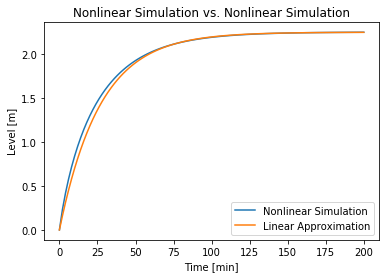

In [32]:
### graph
plt.plot(t,h) # real graph
plt.plot(t,x_pred) # prediction graph
legend_graph = ['Nonlinear Simulation','Linear Approximation']
plt.legend(legend_graph)
plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.title('Nonlinear Simulation vs. Nonlinear Simulation') 
plt.show()